In [1]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import data. 
#Encoded in latin-1 because CSV has characters not compatible with UTF-8
df = pd.read_csv(os.path.join("FIFA_18.csv"), encoding='latin-1')
df.head()

,No,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5M,$565,...,75,96,33,28,26,6,11,15,14,8
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77M,$405,...,85,95,28,31,23,7,11,15,14,11
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5M,$290,...,81,94,27,24,33,9,9,15,15,11
3,3,193080,De Gea,27,Spain,91,93,Manchester United,72M,$260,...,40,68,15,21,13,90,85,87,88,94
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102M,$355,...,79,88,68,58,51,15,13,5,10,13


In [3]:
#Clean data. 
df['Value']=df['Value'].str.extract('(\d*\.\d+|\d+)', expand=False).astype(float)
df['Height']=df['Height'].replace("'",".", regex=True).astype(float)
df['Weight'] = pd.to_numeric(df['Weight'].astype(str).str[:-3], errors='coerce')

df.head()

,No,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,$565,...,75,96,33,28,26,6,11,15,14,8
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.0,$405,...,85,95,28,31,23,7,11,15,14,11
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,$290,...,81,94,27,24,33,9,9,15,15,11
3,3,193080,De Gea,27,Spain,91,93,Manchester United,72.0,$260,...,40,68,15,21,13,90,85,87,88,94
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102.0,$355,...,79,88,68,58,51,15,13,5,10,13


In [4]:
#Monetary value of each player (in Euros).
target = df["Value"]

In [5]:
#Remove Value column (Value is target data).
#Remove Columns with non-numeric values. 
data = df.drop(["Value","Name","Nationality","Club","Wage","Preferred Foot","Work Rate","Position","Jersey Number","Joined","Contract Valid Until"], axis=1)

#Set column headers as feature names 
feature_names = data.columns
data.head()

#data.to_csv('FIFA_ML_data.csv', index = False)

,No,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Height,Weight,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,158023,31,94,94,5,4,4,5.70,159,...,75,96,33,28,26,6,11,15,14,8
1,1,20801,33,94,94,5,4,5,6.20,183,...,85,95,28,31,23,7,11,15,14,11
2,2,190871,26,92,93,5,5,5,5.90,150,...,81,94,27,24,33,9,9,15,15,11
3,3,193080,27,91,93,4,3,1,6.40,168,...,40,68,15,21,13,90,85,87,88,94
4,4,192985,27,91,92,4,5,4,5.11,154,...,79,88,68,58,51,15,13,5,10,13


In [6]:
#RandomForestRegressor. Best for analyzing and ranking several features.
rf = RandomForestRegressor(n_estimators=900, random_state = 42)
rf = rf.fit(data, target)
rf.score(data, target)

0.9914698475791098

In [7]:
#Calculate importances.
importances = rf.feature_importances_
importances

array([7.47817786e-01, 1.11353842e-02, 6.08413913e-02, 1.51644273e-03,
       5.04933748e-02, 3.78982324e-04, 1.10127454e-03, 6.39076577e-04,
       1.00343852e-03, 2.27531564e-03, 1.36291575e-03, 1.49962276e-02,
       9.70030533e-04, 1.37285116e-03, 6.36136145e-03, 1.06812580e-02,
       2.16464099e-03, 4.78098351e-03, 9.70041244e-04, 9.02263512e-03,
       2.56204489e-03, 1.65522734e-03, 3.24390426e-03, 1.49316179e-02,
       2.08899224e-03, 2.00163421e-03, 1.36610022e-03, 2.12545493e-03,
       1.56775231e-03, 8.76529169e-03, 1.19453490e-03, 1.06457964e-03,
       4.89400003e-03, 5.85298140e-03, 4.27368354e-03, 2.10147048e-03,
       1.43751810e-03, 1.34373541e-03, 1.77276920e-03, 1.01671579e-03,
       1.13928339e-03, 1.89291358e-03, 1.00712269e-03, 8.15260098e-04])

In [8]:
#Order importances.
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.7478177856983179, 'No'),
 (0.06084139132074998, 'Age'),
 (0.05049337483150512, 'Potential'),
 (0.014996227552804855, 'Finishing'),
 (0.014931617909796491, 'Reactions'),
 (0.011135384179999413, 'ID'),
 (0.010681258049481045, 'Dribbling'),
 (0.00902263511973598, 'BallControl'),
 (0.008765291691522967, 'LongShots'),
 (0.0063613614481979166, 'Volleys'),
 (0.005852981400688347, 'Vision'),
 (0.004894000033246147, 'Positioning'),
 (0.004780983512034024, 'FKAccuracy'),
 (0.004273683536357169, 'Penalties'),
 (0.0032439042561728617, 'Agility'),
 (0.0025620448867823497, 'Acceleration'),
 (0.002275315641715036, 'Weight'),
 (0.0021646409926284484, 'Curve'),
 (0.0021254549280178706, 'Stamina'),
 (0.0021014704779736357, 'Composure'),
 (0.002088992239989553, 'Balance'),
 (0.002001634210757632, 'ShotPower'),
 (0.0018929135755324728, 'GKKicking'),
 (0.0017727692002869396, 'SlidingTackle'),
 (0.0016552273428237464, 'SprintSpeed'),
 (0.0015677523121625924, 'Strength'),
 (0.001516442728244998, 'Overall

In [9]:
#Most significant importances. Excluded "Number(No)", I believe list was partly ordered by player value.
X = data[['Age', 'Potential', 'Finishing', 'Reactions', 'Dribbling', 'BallControl', 'LongShots', 'Volleys', 'Vision']]
y = target.values.reshape(-1, 1)
print(X.shape, y.shape)

(501, 9) (501, 1)


In [10]:
#Split training and testing data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
#Normalize data.
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [12]:
#Create logistic regression model.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

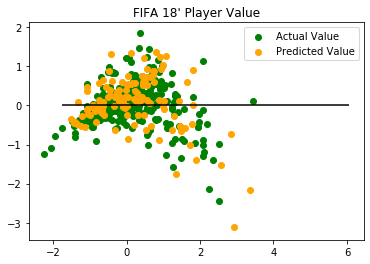

In [13]:
#Plot results
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="green", label="Actual Value")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Predicted Value")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("FIFA 18' Player Value")
plt.show()

In [14]:
#Train model for linear regression predictions
model.fit(X_train, y_train.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#Validate model
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.7506077774932944
Testing Data Score: 0.7341579893003103


In [16]:
#Predict Player Values
predictions = np.round(model.predict(X),1)
print(f"First 10 Predicted Player Values:  {(predictions)[:10].tolist()}")

First 10 Predicted Player Values:  [77.7, 78.8, 71.1, 58.4, 64.7, 60.7, 60.0, 65.0, 54.1, 52.7]


In [17]:
#Rebuild dataframe with predictions.
Predicted_Player_Value = pd.DataFrame(data = predictions, columns = ['Predictions'], index = X.index.copy())
Predicted_Player_Value = pd.merge(df, Predicted_Player_Value, how = 'left', left_index = True, right_index = True)
Predicted_Player_Value.head(10)

,No,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Predictions
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,$565,...,96,33,28,26,6,11,15,14,8,77.7
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.0,$405,...,95,28,31,23,7,11,15,14,11,78.8
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,$290,...,94,27,24,33,9,9,15,15,11,71.1
3,3,193080,De Gea,27,Spain,91,93,Manchester United,72.0,$260,...,68,15,21,13,90,85,87,88,94,58.4
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102.0,$355,...,88,68,58,51,15,13,5,10,13,64.7
5,5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93.0,$340,...,91,34,27,22,11,12,6,8,8,60.7
6,6,177003,L. Modri?,32,Croatia,91,91,Real Madrid,67.0,$420,...,84,60,76,73,13,9,7,14,9,60.0
7,7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80.0,$455,...,85,62,45,38,27,25,31,33,37,65.0
8,8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51.0,$380,...,82,87,92,91,11,8,9,7,11,54.1
9,9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68.0,$94,...,70,27,12,18,86,92,78,88,89,52.7


In [18]:
#Clean new dataframe
Predicted_Player_Value = Predicted_Player_Value.rename({'Predictions': 'Predicted Value EUR(M)', 'Value': 'Actual Value EUR(M)'}, axis=1)

In [19]:
Predicted_Player_Values = Predicted_Player_Value[['Name', 'Age', 'Nationality', 'Actual Value EUR(M)', 'Predicted Value EUR(M)']]

In [20]:
Predicted_Player_Values.head(20)

,Name,Age,Nationality,Actual Value EUR(M),Predicted Value EUR(M)
0,L. Messi,31,Argentina,110.5,77.7
1,Cristiano Ronaldo,33,Portugal,77.0,78.8
2,Neymar Jr,26,Brazil,118.5,71.1
3,De Gea,27,Spain,72.0,58.4
4,K. De Bruyne,27,Belgium,102.0,64.7
5,E. Hazard,27,Belgium,93.0,60.7
6,L. Modri?,32,Croatia,67.0,60.0
7,L. Suárez,31,Uruguay,80.0,65.0
8,Sergio Ramos,32,Spain,51.0,54.1
9,J. Oblak,25,Slovenia,68.0,52.7
